In [1]:
ㅠ

# 웹크롤링

## 웹드라이버 라이브러리 설치 

In [2]:
# anaconde 프롬프트  >  conda install -c conda-forge selenium
from selenium import webdriver

## 크롬 드라이버 설치

In [ ]:
# 구글 > 도움말 > chrome 정보 에서 크롬 버전 확인
# https://chromedriver.chromium.org/downloads
# 버전에 맞는 window용 드라이버 설치

In [3]:
driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')

C:\Users\admin\AppData\Local\Temp\ipykernel_9688\2421840669.py:1: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome('C:/ChromeDriver_exe/chromedriver_102.exe')


## 크롬 브라우저 제어

In [4]:
# 해당 url 열기
driver.get('https://www.naver.com')

'<html lang="ko" data-dark="false" data-useragent="Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.5005.115 Safari/537.36"><head><script async="" type="text/javascript" src="https://ssl.pstatic.net/tveta/libs/ndpsdk/prod/ndp-core.js"></script> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"> <meta name="robots" content="index,nofollow"> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:u
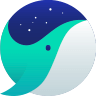
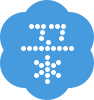

In [5]:
# 해당 페이지의 페이지소스 가져오기
driver.page_source

## html 접근방법 기본

In [ ]:
'''
html <head> 태그 부분은 가려져 있으므로 웹크롤링을 하기 위해선 <body> 태그 영역을 확인하면 된다.

<div class ~~ > : div는 태그이름(blue) class는 태그속성(red)임
'''

In [10]:
html = '''
<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
    <h1> 우리동네시장</h1>
    <div class = 'sale'>
        <p id='fruits1' class='fruits'>
            <span class = 'name'> 바나나 </span>
            <span class = 'price'> 3000원 </span>
            <span class = 'inventory'> 500개 </span>
            <span class = 'store'> 가나다상회 </span>
            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>
        </p>
    </div>
    <div class = 'prepare'>
        <p id='fruits2' class='fruits'>
            <span class ='name'> 파인애플 </span>
        </p>
    </div>
</body>
</html>
'''

In [11]:
# 문자열
html

"\n<html>\n<head>\n<title>테스트 페이지 입니다...</title>\n</head>\n<body>\n    <h1> 우리동네시장</h1>\n    <div class = 'sale'>\n        <p id='fruits1' class='fruits'>\n            <span class = 'name'> 바나나 </span>\n            <span class = 'price'> 3000원 </span>\n            <span class = 'inventory'> 500개 </span>\n            <span class = 'store'> 가나다상회 </span>\n            <a href = 'http://bit.ly/forPlaywithData' > 홈페이지 </a>\n        </p>\n    </div>\n    <div class = 'prepare'>\n        <p id='fruits2' class='fruits'>\n            <span class ='name'> 파인애플 </span>\n        </p>\n    </div>\n</body>\n</html>\n"

In [12]:
# html 의미 부여
soup = bs(html, 'html.parser')
soup


<html>
<head>
<title>테스트 페이지 입니다...</title>
</head>
<body>
<h1> 우리동네시장</h1>
<div class="sale">
<p class="fruits" id="fruits1">
<span class="name"> 바나나 </span>
<span class="price"> 3000원 </span>
<span class="inventory"> 500개 </span>
<span class="store"> 가나다상회 </span>
<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
</p>
</div>
<div class="prepare">
<p class="fruits" id="fruits2">
<span class="name"> 파인애플 </span>
</p>
</div>
</body>
</html>

### html 정보 찾기 > 태그 이름 활용

In [ ]:
# 태그이름, id, class 를 이용하여 필요한 정보 찾기

##### 태그로 정보 찾기

In [13]:
# 태그 중에 span이라는 이름을 가지는(선택적) 모든 것 조회
# select한 결과는 리스트
soup.select('span')

[<span class="name"> 바나나 </span>,
 <span class="price"> 3000원 </span>,
 <span class="inventory"> 500개 </span>,
 <span class="store"> 가나다상회 </span>,
 <span class="name"> 파인애플 </span>]

In [21]:
soup.select('p')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>,
 <p class="fruits" id="fruits2">
 <span class="name"> 파인애플 </span>
 </p>]

##### 속성으로 정보 찾기

In [23]:
# id : 고유한 값, 중복될 수 없음 (접근자 : #)
# class : 중복 가능 (접근자 : .)

In [24]:
# id 속성의 값이 fruits1인 것의 태그(p 태그) 시작과 끝 모두 조회
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [25]:
# class 값이 price인 것을 조회
soup.select('.price')

[<span class="price"> 3000원 </span>]

##### 여러개의 조건으로 정보 찾기

In [26]:
# span 태그의 class 값이 name인 것
soup.select('span.name')

[<span class="name"> 바나나 </span>, <span class="name"> 파인애플 </span>]

In [27]:
# id가 frutis1인 것 
soup.select('#fruits1')

[<p class="fruits" id="fruits1">
 <span class="name"> 바나나 </span>
 <span class="price"> 3000원 </span>
 <span class="inventory"> 500개 </span>
 <span class="store"> 가나다상회 </span>
 <a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>
 </p>]

In [34]:
# id가 fruits1인 것 중 class 값이 name인 것
# 자식(한단계 아래)의 태그로 이동하고싶은 경우 > 활용
soup.select('#fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [36]:
# 태그명이 div이면서 class 이름이 sale인 태그의 자식 중 
# 아이디 이름이 fruits1인 태그 밑에 있는 자식에 대한 태그명이 span이면서
# 클래스 이름이 namea인 태그 모두 찾기
soup.select('div.sale > #fruits1 > span.name')

[<span class="name"> 바나나 </span>]

In [40]:
# 자손인 경우 한칸 공백을 주고 작성
# div 클래스가 sale인 것 중 span 클래스가 name인 것 조회
soup.select('div.sale span.name')

[<span class="name"> 바나나 </span>]

##### 찾은 정보 클래스명 가져오기

In [44]:
# 태그 자체
soup.select('div.sale span.name')[0]

<span class="name"> 바나나 </span>

In [43]:
# 클래스 속성(키)의 값 추출
soup.select('div.sale span.name')[0]['class']

['name']

In [45]:
# a 태그는 링크를 걸어주는 이벤트 태그 (href속성)
soup.select('a')

[<a href="http://bit.ly/forPlaywithData"> 홈페이지 </a>]

In [46]:
# a태그의 href키의 값 조회
soup.select('a')[0]['href']

'http://bit.ly/forPlaywithData'

##### 찾은 정보 텍스트로 가져오기

In [41]:
# select조회는 리스트로 가져오기 때문에 인덱스 후 text
soup.select('div.sale span.name')[0].text

' 바나나 '